<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Отток-клиентов" data-toc-modified-id="Отток-клиентов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Отток клиентов</a></span><ul class="toc-item"><li><span><a href="#Шаг-1.-Изучение-и-подготовка-данных" data-toc-modified-id="Шаг-1.-Изучение-и-подготовка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Шаг 1. Изучение и подготовка данных</a></span></li><li><span><a href="#Шаг-2.-Исследование-задачи" data-toc-modified-id="Шаг-2.-Исследование-задачи-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Шаг 2. Исследование задачи</a></span></li><li><span><a href="#Шаг-3.-Борьба-с-дисбалансом" data-toc-modified-id="Шаг-3.-Борьба-с-дисбалансом-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Шаг 3. Борьба с дисбалансом</a></span></li><li><span><a href="#Шаг-4.-Тестирование-модели" data-toc-modified-id="Шаг-4.-Тестирование-модели-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Шаг 4. Тестирование модели</a></span></li><li><span><a href="#Шаг-5.-Общий-вывод" data-toc-modified-id="Шаг-5.-Общий-вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Шаг 5. Общий вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Отток клиентов

Банковская компания `Бета-Банк` теряет клиентов ежемесячно. Отток небольшой, но заметный, т.е. динамика оттока явно прослеживается. Банковские маркетологи провели исследование и посчитали, что сохранение текущей клиентской базы приведёт к меньшим затратам, чем привлечение новых клиентов. 

**Цель проекта** — спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

**Задача проекта** — построить модель для задачи классификации с предельно большим значением *F1-меры*, дополнительно измеряя метрику AUC-ROC. 

Источником данных является `Kaggle`, одна из наиболее известных платформ для проведения соревнований по Data Science.

> Ссылка на задачу:
[https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### Шаг 1. Изучение и подготовка данных

In [1]:
# импорт библиотек и методов
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os
import urllib.request
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

> Данные о клиентах банка находятся в файле `Churn_Modelling.csv`, который расположен на *Яндекс.Диске*

Чтобы не прилагать файл с данными каждый раз при отправке, напишем код, позволяющий прочитать файл с любого компьютера.

In [2]:
# создание папки 'datsets' в директории
Path('datasets').mkdir(parents=True, exist_ok=True)

# создание словаря с именем файла и ссылкой на него
urls = {
   'Churn_Modelling': ('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QKD42_uJ2hUicg', 'datasets/Churn_Modelling.csv'),

}

# проверка наличия файла 
if not os.path.exists(urls.get('Churn_Modelling')[1]):
    print(urls.get('Churn_Modelling')[1], 'файл не найден, будет загружен из сети')
# скачивание файла по ссылке url и размещение файла по пути file_name
    urllib.request.urlretrieve(*urls.get('Churn_Modelling'))
     
df =  pd.read_csv(urls['Churn_Modelling'][1])

datasets/Churn_Modelling.csv файл не найден, будет загружен из сети


In [3]:
# вывод первых пяти строк таблиц
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Исходные данные:**

Таблица `Churn_Modelling`

`Признаки`

* *RowNumber* — индекс строки в данных
* *CustomerId* — уникальный идентификатор клиента
* *Surname* — фамилия
* *CreditScore* — кредитный рейтинг
* *Geography* — страна проживания
* *Gender* — пол
* *Age* — возраст
* *Tenure* — сколько лет человек является клиентом банка
* *Balance* — баланс на счёте
* *NumOfProducts* — количество продуктов банка, используемых клиентом
* *HasCrCard* — наличие кредитной карты
* *IsActiveMember* — активность клиента
* *EstimatedSalary* — предполагаемая зарплата

`Целевой признак`

* *Exited* — факт ухода клиента

In [4]:
# получение общей информации о данных в таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# проверка наличия пропусков
df.isna().mean().reset_index()

,index,0
0,RowNumber,0.0
1,CustomerId,0.0
2,Surname,0.0
3,CreditScore,0.0
4,Geography,0.0
5,Gender,0.0
6,Age,0.0
7,Tenure,0.0
8,Balance,0.0
9,NumOfProducts,0.0


In [6]:
# получение сводки числовых значений данных в таблицe
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Проанализируем полученную информацию. Таблица содержит 14 колонок с типами данных:
* `int64`
* `float64`
* `object`

В названиях колонок использован стиль наименования переменных *CapitalizedWords*. Нарушения стиля названия имен отсутствуют. Количество значений в стоблцах таблицы не различается. Пропуски отсутствуют. Минимальные значения в колонках выглядят адекватными. Единственное, как можно улучшить представление данных — привести все числовые значения таблицы к типу `int64`.

In [7]:
# приведение типов данных
columns = ['Balance','EstimatedSalary']
for column in columns:
    df[column] = df[column].astype('int64')
# проверка типов данных  
df.dtypes

RowNumber           int64
CustomerId          int64
Surname            object
CreditScore         int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance             int64
NumOfProducts       int64
HasCrCard           int64
IsActiveMember      int64
EstimatedSalary     int64
Exited              int64
dtype: object

Для построения модели предсказания целевого признака *Exited* (факта ухода клиента из банка; 0 — клиент остался в банке, 1 — клиент покинул банк) понадобятся не все признаки (столбцы) в таблице. Так колонки *RowNumber*, *Surname*, *CustomerId* не несут полезной информации для обучения модели, поэтому от них мы можем избавиться.

In [8]:
# удаление лишних колонок таблицы
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)

In [9]:
# проверка колонок таблицы
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Чтобы приступить к обучению модели, необходимо **подготовить входные данные**, а именно:

* все имеющиеся признаки привести к количественному формату (будем использовать OHE)
* разделить исходные данные на признаки (все, кроме колонки `Exited`) и целевой признак (колонка `Exited`)
* разбить данные на три части: *обучающую, валидационную и тестовую* выборки

In [12]:
# приведение признаков к количественному формату
df_ohe = pd.get_dummies(df, drop_first=True)
# деление датафрейма на признаки и целевой признак
features = df_ohe.drop('Exited', axis=1)
target = df_ohe['Exited']

Теперь исходные данные разобьём в соотношении 3:1:1, т.е. *обучающая выборка* составит 60% данных, *валидационная* и *тестовая* — по 20% каждая.

In [13]:
# разбиение данных на три выборки
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

# проверка размеров полученных наборов данных
features_ = [features_train, features_valid, features_test]
target_ = [target_train, target_valid, target_test]

for f,t in zip(features_, target_):
    print(f.shape, t.shape)

(6000, 11) (6000,)
(2000, 11) (2000,)
(2000, 11) (2000,)


In [14]:
# просмотр первых пяти строк признаков обучающей выборки
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,567,35,8,153137,1,1,0,88659,0,1,1
3411,711,37,8,113899,1,0,0,80215,0,0,0
6027,850,44,3,140393,2,0,1,186285,1,0,1
1247,512,24,6,0,2,1,0,37654,0,0,1
3716,665,27,2,147435,1,0,0,187508,1,0,0


Разбросы значений в колонках датафрейма различаются. Те признаки, у которых разброс данных значиельный, будут автоматически признаны алгоритмами моделей машинного обучения более важными. В действительности это не так. Чтобы признаки считались равнозначными, воспользуемся **мастабированием признаков**. Применим метод **стандартизации данных** с помощью структуры данных *StandardScaler*.

In [15]:
# функция стандартизации и обновления датафрейма
def scaler_method(data):
    numeric=['CreditScore', 'Age', 'Tenure',
             'Balance', 'NumOfProducts', 'EstimatedSalary']
    col_names = list(data.columns)
    data[numeric] = scaler.transform(data[numeric])
    data = pd.DataFrame(data, columns=col_names)
    return data

Применим функцию стандартизации к каждой выборке.

In [16]:
# применение функции стандартизации
numeric=['CreditScore', 'Age', 'Tenure',
             'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train = scaler_method(features_train)
features_valid = scaler_method(features_valid)
features_test = scaler_method(features_test)
pd.options.mode.chained_assignment = None

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
# вывод первых пяти значений реобразованных признаков обучающей выборки
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.027273,1.232268,-0.891560,1,0,-0.187698,0,1,1
3411,0.608663,-0.183385,1.027273,0.600556,-0.891560,0,0,-0.333940,0,0,0
6027,2.052152,0.480939,-0.707790,1.027096,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.333248,-1.233162,0.830152,1,0,-1.071058,0,0,1
3716,0.130961,-1.132419,-1.054802,1.140469,-0.891560,0,0,1.524276,1,0,0


**Вывод:**

Данные изучены и подготовлены к обучению.

### Шаг 2. Исследование задачи

Перед рассмотрением моделей машинного обучения, применимых к поставленной задаче, посмотрим на процентное соотношение классов целевого признака. Графически представим картину ушедших и оставшихся клиентов банка.

Text(0.5, 1.0, 'Диаграмма распределения количества ушедших и оставшихся клиентов банка')

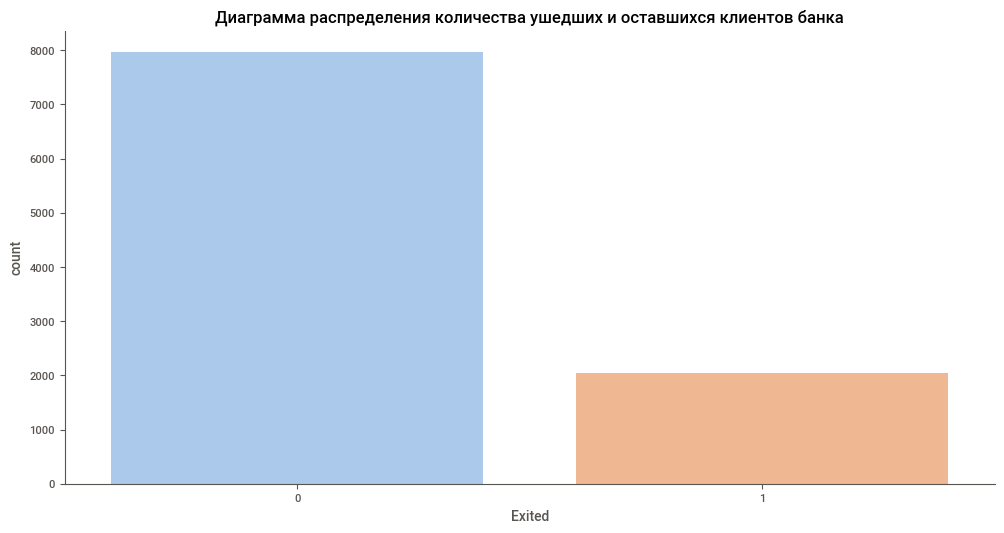

In [30]:
# графическое представление классового распределение целевого признака
data = pd.DataFrame({'Exited':target})
f, ax = plt.subplots(figsize=(12, 6))
sns.despine(f)
sns.countplot(data=data, x='Exited', palette='pastel')
ax.set_title('Диаграмма распределения количества ушедших и оставшихся клиентов банка')

На диаграмме хорошо просматривается превалирование отрицательного класса, т.е. клиентов, которые остались в банке. Однако клиенты, отказавшиеся от услуг банка, составляют около 20% от общего количества. Отток клиентов чётко выражен, как и сообщали банковские маркетологи.

Такой дисбаланс классов может привести к худшему качеству моделей машинного обучения, т.к. алгоритмы в основном будут обучаться на данных большего по размерам класса. Пока не будем учитывать дисбаланс классов и посмотрим, как отработают модели.

Рассмотрим три модели машинного обучения:
* `решающее дерево`
* `случайный лес`
* `логистическая регрессия`

По метрикам *F1-score* и *AUC-ROC*, а также по скоросте работы алгоритма оценим модели по качеству. Также посмотрим на изменение таких метрик, как *recall* и *precision*, по которым рассчитывается метрика *F1-score*.

In [31]:
%%time
# модель решающего дерева
best_model = None
best_result = 0
best_max_depth = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_max_depth = depth

print('F1-score лучшей модели:', round(best_result, 2),
      'Глубина дерева max_depth лучшей модели:', best_max_depth, sep='\n')

F1-score лучшей модели:
0.57
Глубина дерева max_depth лучшей модели:
9
CPU times: user 149 ms, sys: 4.08 ms, total: 154 ms
Wall time: 152 ms


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
# функция расчёта метрик качества модели
def metrics(features, target):
    probabilities_valid = model.predict_proba(features)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target, probabilities_one_valid)
    recall = recall_score(target_valid, predicted_valid)
    precision = precision_score(target_valid, predicted_valid)
    confusion = confusion_matrix(target_valid, predicted_valid)
    
    return print('AUC-ROC модели:', round(auc_roc, 2),
    'Recall модели:', round(recall, 2),
    'Precision модели:', round(precision, 2), 
    'Матрица неточностей модели:', confusion, sep='\n')

In [33]:
# применение функции к модели решающего дерева
metrics(features_valid, target_valid)

AUC-ROC модели:
0.77
Recall модели:
0.46
Precision модели:
0.64
Матрица неточностей модели:
[[1474  108]
 [ 224  194]]


При обучении на несбалансированной выборке модель решающего дерева показала лучший результат при значении гиперпараметра *max_depth = 9*; среднее гармоническое метрик *precision* и *recall*, а именно *F1-score*, составляет меньше 0.6, метрика AUC-ROC составляет около 0.8. В данном примере дисбаланс классов больше повлиял на метрику *F1-score*, в частности на величину *recall*, **долю TP-ответов среди всех, у которых истинная метка 1**. TP-ответов достаточно мало из-за немногочисленности положительного класса, что может приводить к занижению метрики полноты *recall*. Матрица неточностей так же, как и диаграмма выше указывает на превалирование отрицательного класса.

> **Примечание**
>* TP — модель ответил "да" и угадала
>* TN — модель ответил "да" и ошиблась
>* FP — модель ответил "нет" и угадала
>* FN — модель ответил "нет" и ошиблась

In [34]:
%%time
# модель логистической регресии
model = LogisticRegression(solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(metrics(features_valid, target_valid), 
      'F1-score модели:', round(f1_score(target_valid, predicted_valid), 2), sep='\n')

AUC-ROC модели:
0.76
Recall модели:
0.24
Precision модели:
0.57
Матрица неточностей модели:
[[1506   76]
 [ 319   99]]
None
F1-score модели:
0.33
CPU times: user 60.3 ms, sys: 64.5 ms, total: 125 ms
Wall time: 51.4 ms


При обучении на несбалансированной выборке модель логистической регрессии показала более низкое значение метрики *f1-score* в 0.33, полнота *recall* также ниже по отношению к модели решающего дерева. Метрика AUC-ROC практически не отличается от той же метрики предыдущей модели.

In [35]:
%%time
# модель случайного леса
best_model = None
best_result = 0
best_max_depth = 0
best_n_estimators = 0
for est in range(10, 101, 10):
    for depth in range(1, 16, 1):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_max_depth = depth
            best_n_estimators = est
print('F1 лучшей модели:', round(best_result, 2),
      'Глубина дерева max_depth лучшей модели:', best_max_depth,
     'Количество деревьев n_estimators лучшей модели:', best_n_estimators, sep='\n')
print(metrics(features_valid, target_valid))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

F1 лучшей модели:
0.6
Глубина дерева max_depth лучшей модели:
15
Количество деревьев n_estimators лучшей модели:
50
AUC-ROC модели:
0.84
Recall модели:
0.46
Precision модели:
0.77
Матрица неточностей модели:
[[1526   56]
 [ 226  192]]
None
CPU times: user 38.9 s, sys: 261 ms, total: 39.2 s
Wall time: 39.2 s


Лучший результат на несбалансированной выборке показала модель случайного леса с гиперпараметрами *max_depth = 15* и *n_estimators = 50*. Значение метрики *F1-score* составило 0.6, метрика AUC-ROC также показала лучший результат среди моделей, а именно 0.84. Однако поиск оптимального случайного леса занял значительное количество времени.

Чтобы визуально представить значение метрики AUC-ROC(площадь под кривой TPR/FPR), построим график зависимости TPR и FPR от порога классификации для случайного леса.

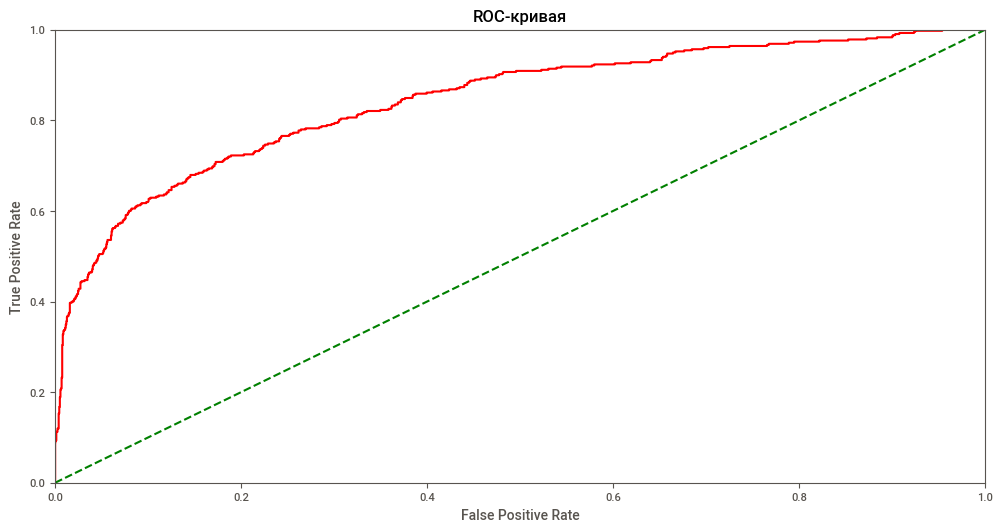

In [37]:
# ROC-кривая модели случайного
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='red')

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--', color='green')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

ROC-кривая стремится к верхнему левому углу, в котором значение TPR = 1, а значение FPR = 0, т.е. все ответы угаданы правильно. ROC-кривая случайной модели представляет из себя прямую, проходящую через точки (0, 0) и (1, 1). Случайная модель с равной вероятностью относит ответ к положительному классу вне зависимости от истинного класса ответа.

**Вывод:**

При дисбалансе классов лучше всего с задачей предсказания целевого признака *Exited* справилась **модель случайного леса**. Модель прошла проверку на валидационной выборке.

### Шаг 3. Борьба с дисбалансом

Чтобы улучшить качество модели, попробуем разобраться с дисбалансом классов несколькими способами. Будем использовать следующие методы:

* *взвешивание классов*
* *увеличение/уменьшение выборки пропрционально большему/меньшему классу*
* *нивелирование порога классификации*

**Взвешивание классов**

Алгоритмы машинного обучения считают все объекты обучающей выборки равнозначными по умолчанию. Чтобы сбалансировать выборку, придадим объектам редкого класса (*Exited = 1*) больший вес. Зададим гиперпараметр *class_weight = 'balanced'*.

In [38]:
%%time
# модель решающего дерева
model = DecisionTreeClassifier(random_state=12345, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(metrics(features_valid, target_valid), 
      'F1-score модели:', round(f1_score(target_valid, predicted_valid), 2), sep='\n')

AUC-ROC модели:
0.78
Recall модели:
0.67
Precision модели:
0.47
Матрица неточностей модели:
[[1270  312]
 [ 140  278]]
None
F1-score модели:
0.55
CPU times: user 33 ms, sys: 4.09 ms, total: 37.1 ms
Wall time: 34.5 ms


Взвешивание классов в модели решающего дерева не помогло улучшить метрику *F1-score*, её значение даже уменьшилось с 0.57 до 0.55. AUC-ROC практически не изменилась.

In [39]:
%%time
# модель логистической регресии
model = LogisticRegression(solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(metrics(features_valid, target_valid), 
      'F1-score модели:', round(f1_score(target_valid, predicted_valid), 2), sep='\n')

AUC-ROC модели:
0.76
Recall модели:
0.24
Precision модели:
0.57
Матрица неточностей модели:
[[1506   76]
 [ 319   99]]
None
F1-score модели:
0.33
CPU times: user 49.5 ms, sys: 80.3 ms, total: 130 ms
Wall time: 57.1 ms


На модель логистической регрессии взвешивание классов не оказало никакого влияния, метрика *F1-score* также принимает низкое значение.

In [40]:
%%time
# модель случайного леса
model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=15, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(metrics(features_valid, target_valid), 
      'F1-score модели:', round(f1_score(target_valid, predicted_valid), 2), sep='\n')

AUC-ROC модели:
0.84
Recall модели:
0.48
Precision модели:
0.75
Матрица неточностей модели:
[[1517   65]
 [ 218  200]]
None
F1-score модели:
0.59
CPU times: user 345 ms, sys: 4.07 ms, total: 350 ms
Wall time: 348 ms


Значение метрики *F1-score* модели случайного леса понизилось с 0.6 до 0.59. AUC-ROC не изменилась.

> **Прмечание:**
>в целом `взвешивание классов` оказалось неэффективным способом борьбы с дисбалансом в данной задаче.

**Увеличение `upsampling` /уменьшение `downsamplng` выборки**

Сначала протестируем `upsampling`, увеличение количества объектов редкого класса. В нашем случае это объекты положительного класса.
Преобразование выборки будет происходить в такой последовательности:
* разделим обучающую выборку на отрицательные и положительные объекты;
* скопируем положительные объекты некоторое количество раз;
* создадим новую обучающую выборку с учётом преобразований;
* изменим порядок данных(перемешаем данные)

Напишем функцию для увеличения выборки.

In [41]:
# функция увеличения выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Применим функцию последовательно для трёх рассмотренных моделей машинного обучения.

In [42]:
%%time
# модель решающего дерева
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print(metrics(features_valid, target_valid), 
      'F1-score модели:', round(f1_score(target_valid, predicted_valid), 2), sep='\n')

AUC-ROC модели:
0.68
Recall модели:
0.49
Precision модели:
0.51
Матрица неточностей модели:
[[1388  194]
 [ 214  204]]
None
F1-score модели:
0.5
CPU times: user 46.9 ms, sys: 7.43 ms, total: 54.3 ms
Wall time: 52 ms


In [43]:
%%time
# модель логистической регрессии
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = LogisticRegression(solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print(metrics(features_valid, target_valid), 
      'F1-score модели:', round(f1_score(target_valid, predicted_valid), 2), sep='\n')

AUC-ROC модели:
0.76
Recall модели:
0.68
Precision модели:
0.38
Матрица неточностей модели:
[[1116  466]
 [ 135  283]]
None
F1-score модели:
0.49
CPU times: user 91.1 ms, sys: 107 ms, total: 198 ms
Wall time: 169 ms


In [44]:
%%time
# модель случайного леса
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=15)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print(metrics(features_valid, target_valid), 
      'F1-score модели:', round(f1_score(target_valid, predicted_valid), 2), sep='\n')

AUC-ROC модели:
0.84
Recall модели:
0.58
Precision модели:
0.65
Матрица неточностей модели:
[[1449  133]
 [ 174  244]]
None
F1-score модели:
0.61
CPU times: user 496 ms, sys: 0 ns, total: 496 ms
Wall time: 494 ms


По сравнению со взвешиванием классов при использовании техники `upsampling` модель решающего дерева ухудшила свои показатели по оцениваемым метрикам *f1-score* и *AUC-ROC*. Модель логистической регрессии улучшила значение метрики *f1-score* на 16%. Метрика *f1-score* модели случайного леса приняла значение большее 60%, т.е. показала хороший результат.

Теперь поступим по-другому. Сократим количество объектов частого класса, в нашем случае отрицательного класса. Этапы преобразования выборки техникой `downsampling`:
* деление обучающей выборки на отрицательные и положительные объекты;
* отбрасывание части отрицательных объектов случайным образом;
* создание новой выборки с учётом преобразований;
* перемешивание данных

Напишем функцию для уменьшения выборки.

In [45]:
# функция уменьшения выборки 
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled 

Применим функцию последовательно для трёх рассмотренных моделей машинного обучения.

In [46]:
%%time
# модель решающего дерева
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print(metrics(features_valid, target_valid), 
      'F1-score модели:', round(f1_score(target_valid, predicted_valid), 2), sep='\n')

AUC-ROC модели:
0.69
Recall модели:
0.7
Precision модели:
0.37
Матрица неточностей модели:
[[1093  489]
 [ 126  292]]
None
F1-score модели:
0.49
CPU times: user 32 ms, sys: 42 µs, total: 32 ms
Wall time: 30.4 ms


In [47]:
%%time
# модель логистической регрессии
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = LogisticRegression(solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print(metrics(features_valid, target_valid), 
      'F1-score модели:', round(f1_score(target_valid, predicted_valid), 2), sep='\n')

AUC-ROC модели:
0.76
Recall модели:
0.66
Precision модели:
0.38
Матрица неточностей модели:
[[1124  458]
 [ 141  277]]
None
F1-score модели:
0.48
CPU times: user 90.1 ms, sys: 51.2 ms, total: 141 ms
Wall time: 37.8 ms


In [48]:
%%time
# модель случайного леса
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=15)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print(metrics(features_valid, target_valid), 
      'F1-score модели:', round(f1_score(target_valid, predicted_valid), 2), sep='\n')

AUC-ROC модели:
0.84
Recall модели:
0.58
Precision модели:
0.65
Матрица неточностей модели:
[[1449  133]
 [ 174  244]]
None
F1-score модели:
0.61
CPU times: user 490 ms, sys: 470 µs, total: 491 ms
Wall time: 508 ms


При использовании техники `downsampling` по оцениваемым показателям *f1-score* и *AUC-ROC* также лидирует модель случайного леса. Показатели данной модели не изменились относительно техники `upsampling`.

**Нивелирование порога классификации**

Протестируем ещё один вид борьбы с дисбалансом — изменение порога классификации. Границу между отрицательным и положительным классами будет двигать в цикле и выберем лучшее значение, при котором оцениваемые метрики примут максимальные значения.

In [49]:
%%time
# модель решающего дерева
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC модели:', round(auc_roc, 2))

for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    print("Порог = {:.2f} | Точность = {:.3f} | Полнота = {:.3f} | F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))

AUC-ROC модели: 0.68
Порог = 0.00 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.02 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.04 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.06 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.08 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.10 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.12 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.14 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.16 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.18 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.20 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.22 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.24 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.26 | Точность = 0.490 | Полнота = 0.493 | F1-мера = 0.492
Порог = 0.28 | Точность = 0

In [50]:
%%time
# модель логистической регрессии
model = LogisticRegression(solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC модели:', round(auc_roc, 2))

for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    print("Порог = {:.2f} | Точность = {:.3f} | Полнота = {:.3f} | F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))

AUC-ROC модели: 0.76
Порог = 0.00 | Точность = 0.209 | Полнота = 1.000 | F1-мера = 0.346
Порог = 0.02 | Точность = 0.211 | Полнота = 1.000 | F1-мера = 0.349
Порог = 0.04 | Точность = 0.226 | Полнота = 0.990 | F1-мера = 0.368
Порог = 0.06 | Точность = 0.245 | Полнота = 0.967 | F1-мера = 0.391
Порог = 0.08 | Точность = 0.258 | Полнота = 0.923 | F1-мера = 0.403
Порог = 0.10 | Точность = 0.276 | Полнота = 0.897 | F1-мера = 0.422
Порог = 0.12 | Точность = 0.299 | Полнота = 0.864 | F1-мера = 0.444
Порог = 0.14 | Точность = 0.323 | Полнота = 0.823 | F1-мера = 0.464
Порог = 0.16 | Точность = 0.336 | Полнота = 0.770 | F1-мера = 0.468
Порог = 0.18 | Точность = 0.359 | Полнота = 0.732 | F1-мера = 0.482
Порог = 0.20 | Точность = 0.369 | Полнота = 0.677 | F1-мера = 0.478
Порог = 0.22 | Точность = 0.387 | Полнота = 0.634 | F1-мера = 0.481
Порог = 0.24 | Точность = 0.415 | Полнота = 0.617 | F1-мера = 0.496
Порог = 0.26 | Точность = 0.440 | Полнота = 0.593 | F1-мера = 0.505
Порог = 0.28 | Точность = 0

In [51]:
%%time
# модель случайного леса
model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=15)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC модели:', round(auc_roc, 2))

for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    
    print("Порог = {:.2f} | Точность = {:.3f} | Полнота = {:.3f} | F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))

AUC-ROC модели: 0.84
Порог = 0.00 | Точность = 0.213 | Полнота = 0.998 | F1-мера = 0.351
Порог = 0.02 | Точность = 0.235 | Полнота = 0.969 | F1-мера = 0.378
Порог = 0.04 | Точность = 0.261 | Полнота = 0.952 | F1-мера = 0.409
Порог = 0.06 | Точность = 0.287 | Полнота = 0.931 | F1-мера = 0.439
Порог = 0.08 | Точность = 0.313 | Полнота = 0.907 | F1-мера = 0.466
Порог = 0.10 | Точность = 0.333 | Полнота = 0.883 | F1-мера = 0.484
Порог = 0.12 | Точность = 0.355 | Полнота = 0.856 | F1-мера = 0.502
Порог = 0.14 | Точность = 0.384 | Полнота = 0.840 | F1-мера = 0.527
Порог = 0.16 | Точность = 0.405 | Полнота = 0.806 | F1-мера = 0.539
Порог = 0.18 | Точность = 0.432 | Полнота = 0.789 | F1-мера = 0.558
Порог = 0.20 | Точность = 0.458 | Полнота = 0.766 | F1-мера = 0.573
Порог = 0.22 | Точность = 0.475 | Полнота = 0.742 | F1-мера = 0.579
Порог = 0.24 | Точность = 0.490 | Полнота = 0.708 | F1-мера = 0.579
Порог = 0.26 | Точность = 0.529 | Полнота = 0.701 | F1-мера = 0.603
Порог = 0.28 | Точность = 0

Показатели модели решающего дерева не менялись в зависимости от порога классификации. Модель логистической регрессии при пороге классификации в 0.36 показала свой лучший результат — *f1-score = 0.505*. Самый высокий результат показала модель случайного леса при пороге классификации в 0.38. На тестирование пропустим **модель случайного леса** с порогом классификации в 0.38 и эту же модель, но с использовнием техники `upsampling` и `downsampling`.

**Вывод:**

Учтён дисбаланс классов при построении моделей машинного обучения. Отобраны лучшие модели для тестирования.

### Шаг 4. Тестирование модели

Проведём тестирование трёх отобранных моделей и выберем лучшую.

In [52]:
%%time
# модель случайного леса с изменённым порогом классификации
model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=15)
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

predicted_test = probabilities_one_test > 0.38
precision = precision_score(target_test, predicted_test)
recall = recall_score(target_test, predicted_test)
f1 = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
    
print("Порог = 0.38 | Точность = {:.3f} | Полнота = {:.3f} | F1-мера = {:.3f} | Площадь под кривой AUC-ROC = {:.2f} ".format(
    threshold, precision, recall, f1, auc_roc))

Порог = 0.38 | Точность = 0.480 | Полнота = 0.677 | F1-мера = 0.546 | Площадь под кривой AUC-ROC = 0.60 
CPU times: user 325 ms, sys: 564 µs, total: 326 ms
Wall time: 324 ms


In [53]:
%%time
# модель случайного леса с увеличенной выборкой
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=15)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print(metrics(features_valid, target_valid), 
      'F1-score модели:', round(f1_score(target_valid, predicted_valid), 3), sep='\n')

AUC-ROC модели:
0.84
Recall модели:
0.5
Precision модели:
0.77
Матрица неточностей модели:
[[1520   62]
 [ 211  207]]
None
F1-score модели:
0.603
CPU times: user 499 ms, sys: 471 µs, total: 499 ms
Wall time: 497 ms


In [54]:
%%time
# модель случайного леса с уменьшенной выборкой
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=15)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print(metrics(features_valid, target_valid), 
      'F1-score модели:', round(f1_score(target_valid, predicted_valid), 3), sep='\n')

AUC-ROC модели:
0.84
Recall модели:
0.5
Precision модели:
0.77
Матрица неточностей модели:
[[1520   62]
 [ 211  207]]
None
F1-score модели:
0.603
CPU times: user 505 ms, sys: 407 µs, total: 506 ms
Wall time: 511 ms


Не смотря на то что модель случайного леса с порогом классификации в 0.38 показала самый высокий результат на валидационной выборке, её метрика *F1-score* на тестовой выборке приняла более низкое значение. Модели случайного леса с увеличенной и уменьшенной выборкой показали одинаково высокие значения метрик качества: *AUC-ROC = 0.84, F1-score = 0.603*.

**Вывод:**

Проведено тестирование отобранных моделей машинного обучения. Найдена лучшая модель.

### Шаг 5. Общий вывод

В результате исследования отобрана наиболее высокая по качеству модель — **модель случайного леса, обученная с использованием техник `downsampling` или `upsampling`(обе техники показали одинаково высокие значения оцениваемых метрик)**. Метрика качества *F1-score* доведена до достаточно высокого значения в **0.603**, а метрика *AUC-ROC* показала результат в **0.84**, который является хорошим показателем *(максимальное значение метрик — 1)*. В целом метрика *AUC-ROC* демонстрировала более высокие значения, чем метрика *F1-score* вне зависимости от баланса классов, т.е. показатель *AUC-ROC* менее чувствителен к дисбалансу классов. Поэтому предпочтение в выборе модели отдавалось показателю *F1-score*, в который входит метрика *precision*, явно реагирующая на дисбаланс. По времени работы модель случайного леса уступает остальным моделям, однако приоритетом в данном случае время не обладает.

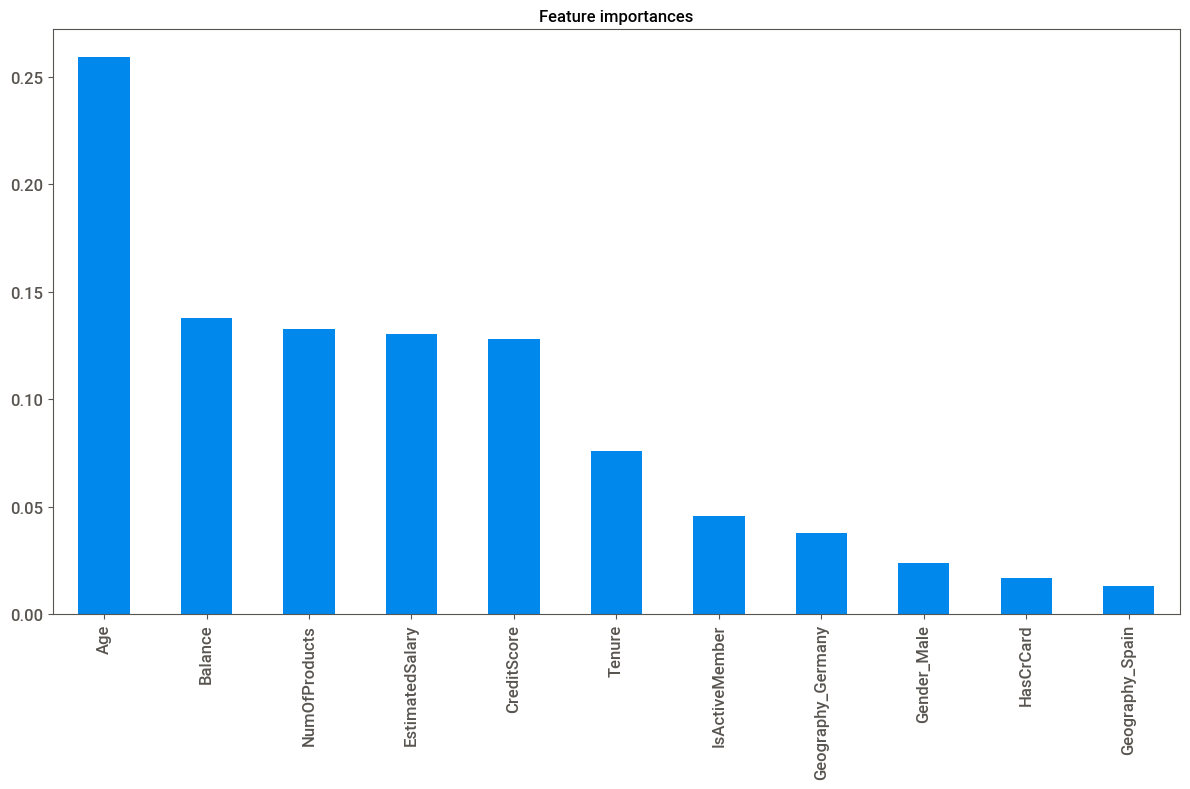

In [60]:
# вывод графика важности признаков
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=features_train.columns)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar(figsize=(12,8))
ax.set_title("Feature importances")
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
fig.tight_layout()